In [1]:
%%capture
!pip install opencv-python

In [2]:
%%HTML
<script src="require.js"></script>

In [3]:
from IPython.display import display, HTML, clear_output
HTML('''
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script><script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

<img src='banner.gif'/>

<center>by <b>Paulo Mario P. Medina</b></center>
<center>Machine Learning | MSDS 2024 | Asian Institute of Management</center>
<center>Submitted 9 December 2023</center>

<a id='Libraries'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>IMPORT LIBRARIES AND FUNCTIONS</b></h1>

In [4]:
import numpy as np
import cv_helpers
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
import importlib
importlib.reload(cv_helpers)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
import ipywidgets as widgets

<h2>Import Libraries and Functions</h2>
<p>The following libraries and functions were imported:</p>
<ul>
    <li><b>numpy</b> for operations and functions involving arrays</li>
    <li><b>cv_helpers</b> for the creator-defined functions, which are heavily involved in image processing</li>
    <li><b>matplotlib's pyplot</b> for plotting visualizations</li>
    <li><b>sklearn's silhouette_score</b> for calculating the silhouette scores and using these to get the optimal number for k in k-means clustering</li>
    <li><b>IPython</b> for display and HTML purposes</li>
    <li><b>warnings</b> for filtering irrelevant warnings in the notebook</li>
    <li><b>sklearn's StandardScaler</b> for scaling purposes in the ML pipeline</li>
    <li><b>pandas</b> for handling dataframes from GridSearchCV</li>
    <li><b>sklearn's metrics</b> for calculating the metrics of the chosen model</li>
    <li><b>sklearn's ML models (SVC, e.g.)</b> for acquiring test scores and accuracies</li>
    <li><b>importlib</b> for re-importing the helpers file</li>
</ul>

<p>The following libraries and functions were imported in <b>cv_helpers</b>:</p>
<ul>
    <li><b>opencv</b> for operations and functions involved in image processing</li>
    <li><b>numpy</b> for operations and functions involving arrays</li>
    <li><b>sklearn's Kmeans and MiniBatchKMeans</b> for predicting the clusters for each image feature and for acquiring the inertia of the k-means clusters created</li>
    <li><b>sklearn's StandardScaler</b> for scaling the values of the image features and scaling the bag-of-visual-words derived from the frequencies of each cluster for each image</li>
    <li><b>matplotlib's pyplot</b> for plotting visualizations</li>
    <li><b>OS</b> for easier representation, viewing, and access of the files in the directory</li>
    <li><b>random</b> for picking a random image to predict from the chest x-ray directory</li>
    <li><b>sklearn's train_test_split</b> for splitting the original training set into training and validation sets</li>
    <li><b>sklearn's ML models (SVC, e.g.)</b> for creating machine learning models</li>
    <li><b>IPython</b> for prettified dataframe display purposes</li>
</ul>

<a id='TOC'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>TABLE OF CONTENTS</b></h1>

<h2>Table of Contents</h2>
<p style='text-indent: 2em'><a href='#Problem' style='color: #000000'>I. Problem Description</a></p>
<p style='text-indent: 2em'><a href='#Highlights' style='color: #000000'>II. Key Highlights</a></p>
<p style='text-indent: 2em'><a href='#Description' style='color: #000000'>III. Data Source</a></p>
<p style='text-indent: 2em'><a href='#Scope' style='color: #000000'>IV. Scope and Limitation</a></p>
<p style='text-indent: 2em'><a href='#Cleaning' style='color: #000000'>V. Data Cleaning and Exploration</a></p>
<p style='text-indent: 2em'><a href='#Preprocessing' style='color: #000000'>VI. Data Preprocessing</a></p>
<p style='text-indent: 2em'><a href='#Pipeline' style='color: #000000'>VII. Machine Learning Pipeline</a></p>
<p style='text-indent: 2em'><a href='#Results' style='color: #000000'>VIII. Results and Discussion</a></p>
<p style='text-indent: 2em'><a href='#Conclusion' style='color: #000000'>IX. Conclusion</a></p>
<p style='text-indent: 2em'><a href='#Recommendations' style='color: #000000'>X. Recommendations</a></p>
<p style='text-indent: 2em'><a href='#References' style='color: #000000'>References</a></p>

<a id='Problem'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>I. PROBLEM DESCRIPTION</b></h1>

<h2>Problem Overview</h2>
<p style='text-indent: 2em'>Clinically, pneumonia is a very common, lower respiratory infection (LRI) or disease which causes symptoms such as cough, sputum production (mucus from the lower airways), chest pain, fever, and confusion.<sup><a href='#One'>1</a></sup> Epidemiologically, pneumonia is known to contribute to a high disease burden, where disease burden is the "impact of a health problem on a given population, measured using indicators such as mortality, morbidity, and financial costs"<sup><a href='#One'>1,2</a></sup>. This is linked to how according to the Global Burden of Disease Study 2015, given that LRIs were the "leading infectious cause of death and the fifth leading cause of death overall", pneumococcal pneumonia, a type of bacterial pneumonia, caused 55% of these deaths in all ages, which is approximately 1.5 million deaths. Hence, until now, it still is a health problem faced worldwide, even in high-income countries such as the USA.<sup><a href='#One'>1</a></sup></p>

<p style='text-indent: 2em'>In fact, in relation to what was said about it being a worldwide problem, there is a recent surge in pneumonia, particularly, pediatric mycoplasma pneumonia, a type of bacterial pneumnonia in children, in China and Denmark.<sup><a href='#Three'>3</a></sup> Given its contribution to global disease burden and given the recent surge in pneumonia cases, it is becoming more imperative to streamline the diagnosis of pneumonia especially among children. Moreover, another reason which supports the streamlining of pneumonia diagnosis is that one of the diagnostic tools for diagnosing pneumonia is chest radiography or chest x-rays (CXR) and that the turnaround time (TAT) or the time it takes for a radiologist to interpret a single chest radiograph is 15 minutes.<sup><a href='#One'>1,4</a></sup> Although 15 minutes by itself is a short time, in cases of surges, this is multiplied by the number of patients who arrive concurrently, and this further compounds the increasing workload of radiologists (where there is indeed an increasing trend found among US radiologists in 2006-2007).<sup><a href='#Five'>5</a></sup></p>

<p style='text-indent: 2em'>Hence, this is where machine learning comes in. As posited by Diamant, et. al., incorporating bag-of-visual-word method (BoVW), a method for acquiring features from images, and support vector machine classifiers has been proven to be successful in medical image classification, where through this, cases suspected of pneumonia can be easily classified as normal or pneumonia cases.<sup><a href='#Six'>6</a></sup> This may be partly because x-ray images which are indicative of pneumonia contain white spots called infiltrates, which may serve as the defining features for pneumonia.<sup><a href='#Seven'>7</a></sup> In this study, however, while incorporating the BoVW method in acquiring the features of the radiographs, other classification models such as k-nearest neighbors classifier, logistic regression, random forest classifier, and gradient boosting classifier would be tested for their training, validation, and test accuracy. The best model based on the validation accuracy would then be evaluated using other metrics such as runtime, precision, recall, sensitivity, specificity, and the area under its receiver operating characteristic (ROC) curve.</p>

<h2>Objectives</h2>
<ol>
    <li>Implement a machine learning pipeline which reads x-ray images, vectorizes and scales them, and predicts whether they are normal x-ray images or x-ray images showing signs of pneumonia.</li><br>
    <li>Evaluate the machine learning model and discuss the implications of the results of the evaluation.</li><br>
</ol>

[Back to Table of Contents](#TOC)

<a id='Highlights'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>II. KEY HIGHLIGHTS</b></h1>

<ol>
    <li>Using the BoVW method, the optimal number of "visual words" was found to be <b>seven</b>.</li><br>
    <li>The SVC model (Sigmoid; C = 0.01) was most accurate in terms of <b>validation (0.80) and test accuracy (0.69)</b>.</li><br>
    <li>The model is <b>slightly biased towards pneumonia cases</b> (Precision: 0.61:0.72) (Recall: 0.48:0.82).</li><br>
    <li>This is supported by a <b>sensitivity:specificity of 0.82:0.48</b>, with more accuracy for positives.</li><br>
    <li>With <b>ROC-AUC = 0.76</b>, the model is a good classifier, specifically, <b>a good screening tool</b>.</li><br>
</ol>

[Back to Table of Contents](#TOC)

<a id='Description'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>III. DATA SOURCE</b></h1>

<p style='text-indent: 2em'>The dataset was sourced from Kaggle from Paul Mooney.<sup><a href='#Eight'>8</a></sup> The dataset, which is aptly named as "Chest X-Ray Images (Pneumonia)" contains 5,863 X-Ray images (in JPEG format) and 2 categories (Pneumonia/Normal). According to the author of the Kaggle post, all chest radiographs were initially screened for quality control by not including the low quality and unreadable scans. The created diagnoses for each image were then graded by two expert physicians before being treated as cleared for AI system training. As a precautionary measure, the eavluation set was also checked by a third error, to account for any grading errors.<sup><a href='#Eight'>8</a></sup></p>

<p style='text-indent: 2em'>The X-ray images are divided into three subdivisions such as the training, testing, and validation set. The training set originally contains 5,216 X-ray images where there are 1,341 normal X-ray images and 3,875 pneumonia X-ray images, while the testing set contains 624 X-ray images where there are 234 normal X-ray images and 390 pneumonia X-ray images. Lastly, the validation set contains 16 X-ray images, where each class (normal and pneumonia) has 8 X-ray images associated to it. Given the small sample for the validation set, these would be combined with the training set, and a 80-20 split for each class would be done on the training set to arrive at the final training and validation sets, respectively.</p>

[Back to Table of Contents](#TOC)

<a id='Scope'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>IV. SCOPE AND LIMITATION</b></h1>

<h2>Scope</h2>

<p style='text-indent: 2em'>According to Paul Mooney, the "chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou".<sup><a href='#Eight'>8</a></sup> This means that the resulting machine learning model would only be representative of Chinese pediatric patients particularly, aged one to five years old, and to be more stringent, from Guangzhou city.</p>

<h2>Limitation</h2>

<p style='text-indent: 2em'>This may mean that the model could not be used for patients of different age groups, different ethnicities and of different geographical origins, as the model is inherently biased to the aforementioned demographic.</p>

[Back to Table of Contents](#TOC)

<a id='Cleaning'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>V. DATA CLEANING AND EXPLORATION</b></h1>

<h2>Data Cleaning</h2>

<center><img src='no_features.jpeg'/></center>

<center><b>Figure 1.</b> Example of A Removed Image</center>

<p style='text-indent: 2em'>Given an imbalanced training dataset where there are only 1,341 normal X-ray images and 3,875 pneumonia X-ray images, downsampling was employed to the pneumonia X-ray images, effectively reducing the 3,875 images to 1,341 images. This is in order to avoid introducing positive class bias to the model.<sup><a href='#Nine'>9</a></sup> As an aside, some of the images removed were the ones where no features was acquired; this is to preserve most of the integrity of the dataset, where only faulty or irrelevant images were removed and the more relevant or substantial images were kept. Lastly, even if these images were removed, each class still is comprised of at least 1,000 images, which is the rule-of-thumb set for image classification tasks.<sup><a href='#Ten'>10</a></sup></p>

<h2>Data Exploration</h2>
<p style='text-indent: 2em'>Given that the dataset is comprised of images, it would be better to explore the dataset by looking at the visual features of each image from each class.</p>


<center><img src='chest_xrays/train/normal/IM-0115-0001.jpeg' height=300px width=300px/></center>

<center><b>Figure 2.</b> Normal X-ray Training Image</center>

<p style='text-indent: 2em'>As seen in the image above, there are no signs of consolidations or infiltrates (white spots) in the lung area which mean that there are no signs of pneumonia in the training image above.</p>

<center><img src='chest_xrays/train/pneumonia/person319_bacteria_1477.jpeg' height=300px width=300px/></center>

<center><b>Figure 3.</b> Pneumonia X-ray Training Image</center>

<p style='text-indent: 2em'>As seen in the image above, there are signs of consolidations or infiltrates (white spots) in the lung area which mean that there is a collection of pus in the lungs.<sup><a href='#Eleven'>11</a></sup> As seen in the previous image, instead of the dark-grayish color in the lung area, there are solid parts which are white in color, suggesting that other particles which are more dense (which get projected as white in the X-ray image) than the usual air particles in the lungs are present.<sup><a href='#Twelve'>12</a></sup></p>

<p style='text-indent: 2em'>Hence, what could be gleaned from this small-scale exploratory data analysis is that instead of focusing solely on increasing the contrast as to separate the white parts from the dark parts (where there may be a problem with doing this as the bones themselves are also white and may be taken for as pneumonia infiltrates), acquiring the edges or corners of these white spots which are vastly different from the edges and corners of the body would be the better focus during image preprocessing.</p>

[Back to Table of Contents](#TOC)

<a id='Preprocessing'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>VI. DATA PREPROCESSING</b></h1>

<h2>Loading and Preprocessing the Images</h2>

<p style='text-indent: 2em'>Before fitting the model, the images would be first loaded and preprocessed using the <mark style='background-color: #EEEEEE'>import_and_derive_features</mark> function from the cv_helpers library.</p>

In [5]:
# Acquiring features from the normal X-ray images in the training set
lst_train_normal = cv_helpers.import_and_derive_features('train', 'normal')

In [6]:
# Acquiring features from the pneumonia X-ray images in the training set
lst_train_pneu = cv_helpers.import_and_derive_features('train', 'pneumonia')

In [7]:
# Acquiring features from the normal X-ray images in the validation set
lst_val_normal = cv_helpers.import_and_derive_features('val', 'normal')

In [8]:
# Acquiring features from the pneumonia X-ray images in the validation set
lst_val_pneu = cv_helpers.import_and_derive_features('val', 'pneumonia')

In [9]:
# Acquiring features from the normal X-ray images in the test set
lst_test_normal = cv_helpers.import_and_derive_features('test', 'normal')

In [10]:
# Acquiring features from the pneumonia X-ray images in the test set
lst_test_pneu = cv_helpers.import_and_derive_features('test', 'pneumonia')

<p style='text-indent: 2em'>In order to understand the full preprocessing of the image, each step of the <mark style='background-color: #EEEEEE'>import_and_derive_features</mark> would be described in full visual and mathematical detail.</p>

<center><img src='original.jpeg' height=300px width=300px/></center>

<center><b>Figure 4.</b> Original X-ray Image</center>

<p style='text-indent: 2em'>The image is first loaded using the <mark style='background-color: #EEEEEE'>imread</mark> function of OpenCV, where the image is saved as a numpy array, corresponding to the blue, green, and red values of each pixel in the image.<sup><a href='#Thirteen'>13</a></sup></p>

<center><img src='filter_one.jpg' height=300px width=300px/></center>

<center><b>Figure 5.</b> Resized X-ray Image</center>

<p style='text-indent: 2em'>The created array is then resized to a 256 by 256 array, wherein smaller images which are increased in size makes use of interpolation for the new pixels while larger images which are decreased in size resample the pixels, in an effort to lessen the pixels.<sup><a href='#Fourteen'>14</a></sup> This is in order to match the sizes for all images and to reduce potential computational complexity for some images which are larger than the set dimensions.</p>

<center><img src='filter_two.jpg' height=300px width=300px/></center>

<center><b>Figure 6.</b> Same X-ray Image with Gaussian Filtering</center>

<p style='text-indent: 2em'>Using Gaussian filtering, the noise and irrelevant details in the image are reduced, allowing the relevant white spots or infiltrates to surface more in the image. As stated by Fisher, Perkins, Walker, and Wolfart, the Gaussian filter "outputs a weighted average of each pixel's neighborhood", where more weight is given the pixels near the center.<sup><a href='#Fifteen'>15</a></sup> This then smoothens the image, given that each pixel is now a weighted average of its neighboring pixels.</p> 

<center><img src='filter_three.jpg' height=300px width=300px/></center>

<center><b>Figure 7.</b> Grayscaled X-ray Image</center>

<p style='text-indent: 2em'>Although it is not obvious, the X-ray image was grayscaled, or its RGB channels was changed to solely a gray channel.<sup><a href='#Sixteen'>16</a></sup> This allows for less computational complexity and easier processing of the image in the machine learning algorithms, given the smaller dimension or shape in the resulting image. The formula for finding the gray value from a RGB-based image is as follows:</p>

<center>$Y = (0.299⋅R) + (0.587⋅G) + (0.114⋅B)$<sup><a href='#Sixteen'>16</a></sup></center><br>
    
<p style='text-indent: 2em'>where Y is the gray value, R is the red value, G is the green value, and B is the blue value.</p>

<center><img src='filter_four.jpg' height=300px width=300px/></center>

<center><b>Figure 8.</b> Same X-ray Image with Equalized Histogram</center>

<p style='text-indent: 2em'>Moving on, in order to understand the effects of equalizing an image histogram, it would be important to first define what an image histogram is. An image histogram is "a graphical representation of the intensity distribution of an image"; the frequency of pixels for a given intensity value populates this histogram.<sup><a href='#Seventeen'>17</a></sup> By equalizing this histogram, the goal is to stretch out this histogram so that other intensity values are also "equally" populated as the other intensity values, instead of having only few intensity values be densely populated.<sup><a href='#Seventeen'>17</a></sup> This then increases the contrast of the image, allowing for easier differentiation of the corners or edges in the picture, which would be most important in the feature (edge or corner) detection phase of the data preprocessing.

In [11]:
%%capture
# Code for getting the histograms
# Plot the before and after histograms side-by-side
before, after = cv_helpers.plot_before_after()
fig, axs = plt.subplots(1, 2)
axs[0].hist(before.ravel(), 256, [0, 256], color="black")
axs[0].set_title("Before Equalizing the Histogram")
axs[0].set_xlabel("Pixel Gray Intensity")
axs[0].set_ylabel("Frequency")
axs[1].hist(after.ravel(), 256, [0, 256], color="black")
axs[1].set_title("After Equalizing the Histogram")
axs[1].set_xlabel("Pixel Gray Intensity")
axs[1].set_ylabel("Frequency")
fig.tight_layout()
plt.show()

<center><img src='histograms.png'/></center>

<center><b>Figure 9.</b> Before and After Equalizing the Histogram</center>

<p style='text-indent: 2em'>As one can see above, the histogram is "equalized" by spreading or widening the histogram to accomodate the other intensity levels, thereby increasing the contrast or variance in intensity levels among the pixels, instead of concentrating most of them at around 200.<sup><a href='#Eighteen'>18</a></sup>

<center><img src='filter_five.jpg' height=300px width=300px/></center>

<center><b>Figure 10.</b> X-ray Image After Using Laplace Operator</center>

<p style='text-indent: 2em'>The Laplace Operator is used to detect the edges of the image, by finding the second derivatives, equal to zero, in both horizontal and vertical gradients of each pixel of an image (which may only be found in local maximal first derivatives, which is used in Sobel Operators).<sup><a href='#Nineteen'>19</a></sup> The reason why derivatives are associated with these operators is because the edges or corners, the most salient and identifying features of an image, are characterized by high changes or differences in pixel intensity, which can only be described by a local maximal first derivative or a second derivative equal to zero.<sup><a href='#Nineteen'>19</a></sup> Moving on, using the Laplace Operator, the Laplacian of a pixel can be calculated, which is derived from its local neighbors (both horizontal and vertical), and through a set threshold for the Laplacian, the pixel can then be mapped as either white or black, hence signifying the edges of the image.<sup><a href='#Twenty'>20</a></sup></p>

<center><img src='filter_six.jpg' height=300px width=300px/></center>

<center><b>Figure 11.</b> 8-bit X-ray Image</center>

<p style='text-indent: 2em'>Using the <mark style='background-color: #EEEEEE'>convertScaleAbs</mark> function from the OpenCV library, the image is converted to 8-bit, leading to less needed processing power and computational complexity.<sup><a href='#Twenty-one'>21</a></sup></p>

In [12]:
count_train = 2158

In [13]:
count_val = 540

In [14]:
count_test = lst_test_normal[0] + lst_test_pneu[0]

<p style='text-indent: 2em'>After doing these for every image, the count of each set of images would then be saved in variables for the BoVW part of the study, where the count of the "validation" is set at 540 (20% of 2,698) while the count of the training set is set at 2,158 (80% of 2,698). Moving on, using the Scale Invariant Feature Transform (SIFT) algorithm, as stated in its name, keypoints (relating to corners of the image) can be detected, regardless of scale, which is very important in processing images such as pneumonia X-ray images which contain white spots which vary in scale or size.<sup><a href='#Twenty-two'>22</a></sup></p>

<p style='text-indent: 2em'>Moreover, by identifying the orientation of these keypoints through the highest magnitudes in the 36-bin orientation histogram (covering all possible directions) formed from the local neighborhood of the keypoint, the rotation or orientation of these keypoints can be effectively "normalized", as to make it rotation-invariant or fixed regardless of any forms of rotation.<sup><a href='#Twenty-three'>23</a></sup></p>

<p style='text-indent: 2em'>Lastly, to provide a descriptor for each feature, by forming a 16x16 local neighborhood around the keypoint (where there are 16 sub-blocks of 4x4 size), an 8-bin histogram (which consists of eight directions) for each sub-block constituting the sum of magnitudes of the orientation of each "sub-sub-block" is created.<sup><a href='#Twenty-three'>23</a></sup> Given that there are 8-bin histograms for all 16 sub-blocks, all of these 8-bin histograms would be appended into one horizontal vector, which would then result to having 128 elements all-in-all.<sup><a href='#Twenty-three'>23</a></sup></p>

<center><img src='neighbors.webp' height=500px width=500px/></center>

<center><b>Figure 12.</b> SIFT Descriptors<sup><a href='#Twenty-three'>23</a></sup></center>

<p style='text-indent: 2em'>As seen above, there is a 16x16 neighborhood created from the keypoint, and each neighbor or 4x4 sub-block are represented by an 8-bin histogram, hence constituting in the end, a 128-element vector (based on 4x4x8 directions).</p>

<center><img src='filter_seven.jpg' height=300px width=300px/></center>

<center><b>Figure 13.</b> X-ray Image with Keypoint Descriptors</center>

<p style='text-indent: 2em'>As seen above, the corners of the image were treated as keypoints (the circles) which differ in size (area of circle) and orientation (which is denoted by the line crossing half of the circle).</p>

<h2>Creating a Bag-of-Visual-Words From The Keypoint Descriptors</h2>

In [15]:
# Training Set
neg_train_X = list(lst_train_normal[1].values())
pos_train_X = list(lst_train_pneu[1].values())

In [16]:
# 80/20 split per class
# 80% of 1349 (Training + "Validation") = 1079
# 20% of 1349 (Training + "Validation") = 270
# Negative Training and Validation Sets
neg_val_X = neg_train_X[:270]
neg_train_X = neg_train_X[270:]
# Positive Training and Validation Sets
pos_val_X = pos_train_X[:270]
pos_train_X = pos_train_X[270:]

In [17]:
# Adding the "validation set" to the training set
neg_train_X.extend(list(lst_val_normal[1].values()))
pos_train_X.extend(list(lst_val_pneu[1].values()))
# Adding the original positive and negatives
# Training Set
neg_train_X.extend(pos_train_X)
X = neg_train_X

In [18]:
# Training Set y
neg_train_y = np.zeros(1079)
pos_train_y = np.ones(1079)
y = np.append(neg_train_y, pos_train_y, axis=0)

In [19]:
# Validation Set X
neg_val_X.extend(pos_val_X)
X_val = neg_val_X

In [20]:
# Validation Set y
neg_val_y = np.zeros(270)
pos_val_y = np.ones(270)
y_val = np.append(neg_val_y, pos_val_y, axis=0)

In [21]:
# Test Set X
neg_test_X = list(lst_test_normal[1].values())
pos_test_X = list(lst_test_pneu[1].values())
neg_test_X.extend(pos_test_X)
X_test = neg_test_X

In [22]:
# Test Set y
neg_test_y = np.zeros(len(lst_test_normal[1]))
pos_test_y = np.ones(len(lst_test_pneu[1]))
y_test = np.append(neg_test_y, pos_test_y, axis=0)

<p style='text-indent: 2em'>An 80/20 split was done for each class in the training set (where in the split, it is assumed that the validation set is already added even if it is not, as to streamline the process), as to maintain the class balance in the training set, where the 20% will be placed as the validation set. The validation set which assumed to be added would then be added to the resulting training set. Moving on, the positive and negative cases in each set are added together and outcome variables are created for each image.</p>

<p style='text-indent: 2em'>Given that there are several features or keypoints acquired from a single image where each image may be denoted by an $m$ x 128 array (where $m$ is the number of features or keypoints acquired), in order to prepare them for clustering (which would essentially help in denoting each image as a single row), all of the keypoints from all the images in each set would be stacked vertically together.</p>

In [23]:
X = cv_helpers.prepare_vstack(X)

In [24]:
X_val = cv_helpers.prepare_vstack(X_val)

In [25]:
X_test = cv_helpers.prepare_vstack(X_test)

In [26]:
%%capture
plt.boxplot(lst_train_normal[1]['IM-0164-0001.jpeg'].flatten(),
            
           flierprops=dict(markeredgecolor='black'),
           medianprops=dict(color='black'))
plt.title('Box Plot of Flattened Keypoints-Descriptors Array')
plt.ylabel('Magnitude/Value')
plt.xlabel('Flattened Keypoint-Descriptors Array')
plt.show()

<center><img src='box_plot_kp.png'/></center>

<center><b>Figure 14.</b> Box-Plot for Flattened Keypoints-Descriptors Array (One Image)</center>

<p style='text-indent: 2em'>Afterwards, the resulting stacked array for the training set is then normalized using the StandardScaler, given that there are several outliers in the descriptors created from the SIFT algorithm as shown above and that the StandardScaler is less sensitive to outliers. The same fitted scaler would be used to scale the validation and test set.</p>

In [27]:
X, scaler = cv_helpers.standardize(X)

In [28]:
X_val = scaler.transform(X_val)

In [29]:
X_test = scaler.transform(X_test)

<p style='text-indent: 2em'>Moving on, the rows in the normalized array of keypoint descriptors would be reduced using k-means clustering. In order to know the number of optimal clusters to use, the elbow method and the silhouette score method would be used. The elbow method is based on the inertia of the k-means cluster, which is essentially the measure of intra-cluster distances, measuring how far a data point is to the average of all data points or the centroid and indicating whether the data points are similar or well-matched to the data points in its cluster. The lower the inertia, the better, and the reason why one would try to find the elbow is to find the point where there is only minimal decreases in inertia (as to avoid creating too many clusters).<sup><a href='#Twenty-four'>24</a></sup></p>

<p style='text-indent: 2em'>On the other hand, the silhouette score "is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation)".<sup><a href='#Twenty-five'>25</a></sup> The average silhouette score is calculated to account for all data points. Given that it is a measure of similarity (and not distance which is characteristic of inertia), the best average silhouette score is the highest average silhouette score, and so, when finding the best number of k to use, the k at the highest average silhouette score (where there is also an elbow in the inertia plot) is used. In order to streamline the process for both metrics, a stochastic form of kmeans clustering called MiniBatchKmeans is used where 200 data points are randomly sampled every iteration and are used to form the clusters, until convergence wherein there are no changes in the clustering after several iterations.<sup><a href='#Twenty-six'>26</a></sup> Moreover, five average silhouette scores for each k would be calculated using different sample sizes, which would be plotted simultaneously and also averaged and plotted as one.</p>

In [30]:
warnings.filterwarnings('ignore')

lst_batch = [100, 500, 1000, 5000, 10000]
lst_wss = []
for i in range (1, 51):
    lst_first = []
    kmeans_model, labels = cv_helpers.mini_batch_kmeans(X, i)
# Calculate silhouette score and inertia
    if i >= 2:
        for j in range(5):
            silhouette_avg = silhouette_score(X, labels,
                                              sample_size=lst_batch[j],
                                              random_state=0)
            lst_first.append(silhouette_avg)
        if i == 2:
            lst_sil = np.array(lst_first)
        else:
            lst_sil = np.vstack((lst_sil, lst_first))
    lst_wss.append(kmeans_model.inertia_)

In [31]:
%%capture
# Plotting the inertia plot
x_ = np.arange(1, 51)
plt.plot(x_, lst_wss, '-o', color='black')
plt.title('k vs. Inertia Plot')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [32]:
%%capture
# Plotting the average silhouette scores
x_ = np.arange(2, 51)
plt.plot(x_, lst_sil[:, 0], '-o', color='#e4e4e4')
plt.plot(x_, lst_sil[:, 1], '-o', color='#e4e4e4')
plt.plot(x_, lst_sil[:, 2], '-o', color='#e4e4e4')
plt.plot(x_, lst_sil[:, 3], '-o', color='#e4e4e4')
plt.plot(x_, lst_sil[:, 4], '-o', color='#000000')
plt.legend(['100', '500', '1000', '5000', '10000'], title='Sample Size')
plt.title('k vs. Average Silhoeutte Score Plot')
plt.xlabel('k')
plt.ylabel('Average Silhouette Score')
plt.show()

In [33]:
lst_sil_ave = np.mean(lst_sil, axis=1)

In [34]:
%%capture
# Plotting the "averaged" silhouette scores
x_ = np.arange(2, 51)
plt.plot(x_, lst_sil_ave, '-o', color='#000000')
plt.title('k vs. Averaged Silhoeutte Score Plot')
plt.xlabel('k')
plt.ylabel('Average Silhouette Score')
plt.show()

<center><img src='inertia_new.png'/></center>

<center><b>Figure 15.</b> k vs. Inertia Plot</center>

<p style='text-indent: 2em'>As seen in the inertia plot, the plot begins to "elbow" or decrease in minimal amounts by k = 7.</p>

<center><img src='new_ave_sil.png'/></center>

<center><b>Figure 16.</b> k vs. Average Silhouette Score Plot</center>

<p style='text-indent: 2em'>As seen in the average silhouette score plot, aside from k = 2 (the starting k given that one cannot compare a data point in a cluster to itself, if k = 1) which is not in line with the elbow method and which would most probably lead to over-simplification of the keypoint descriptors, the highest average silhouette score, which is in line with the elbow method, is at k = 7 also. Hence, nine clusters or "visual words" would be derived from all the keypoint descriptors or "features" of the images.</p>

<center><img src='new_aved_sil.png'/></center>

<center><b>Figure 17.</b> k vs. Averaged Silhouette Score Plot</center>

<p style='text-indent: 2em'>The same can also be said for the averaged silhouette scores plot.</p>

<p style='text-indent: 2em'>In order to lessen stochasticity and to lessen the loss in cluster quality, the original kmeans-clustering function from sklearn would be used, with the k parameter equal to seven.<sup><a href='#Twenty-six'>26</a></sup> The fitted model would then be used for the validation and training set.</p>

In [35]:
kmeans_model, kmeans_cluster = cv_helpers.cluster(X, 7)

In [36]:
X_val_k = kmeans_model.predict(X_val)

In [37]:
X_test_k = kmeans_model.predict(X_test)

<p style='text-indent: 2em'>To form the bag-of-visual-words, the frequencies of the cluster labels for each keypoint descriptor or feature of the image would be consolidated as one array. Hence, the numerous keypoint descriptor rows for a single image are consolidated into one row, a row of visual word frequencies whose shape is 1 row x 9 columns.</p>

In [38]:
# Original list of images is used to acquire the number of keyword descriptors
# in a given image which would be used in indexing the clusters
# neg_train_X is used as it is a placeholder name for the original training
# set, similar logic for the validation and test set
X_desc = neg_train_X
bovw_hist = cv_helpers.develop_vocabulary(count_train,
                                          X_desc,
                                          7,
                                          kmeans_cluster)

In [39]:
X_desc_val = neg_val_X
bovw_hist_val = cv_helpers.develop_vocabulary(count_val,
                                          X_desc_val,
                                          7,
                                          X_val_k)

In [40]:
X_test_val = neg_test_X
bovw_hist_test = cv_helpers.develop_vocabulary(count_test,
                                          X_test_val,
                                          7,
                                          X_test_k)

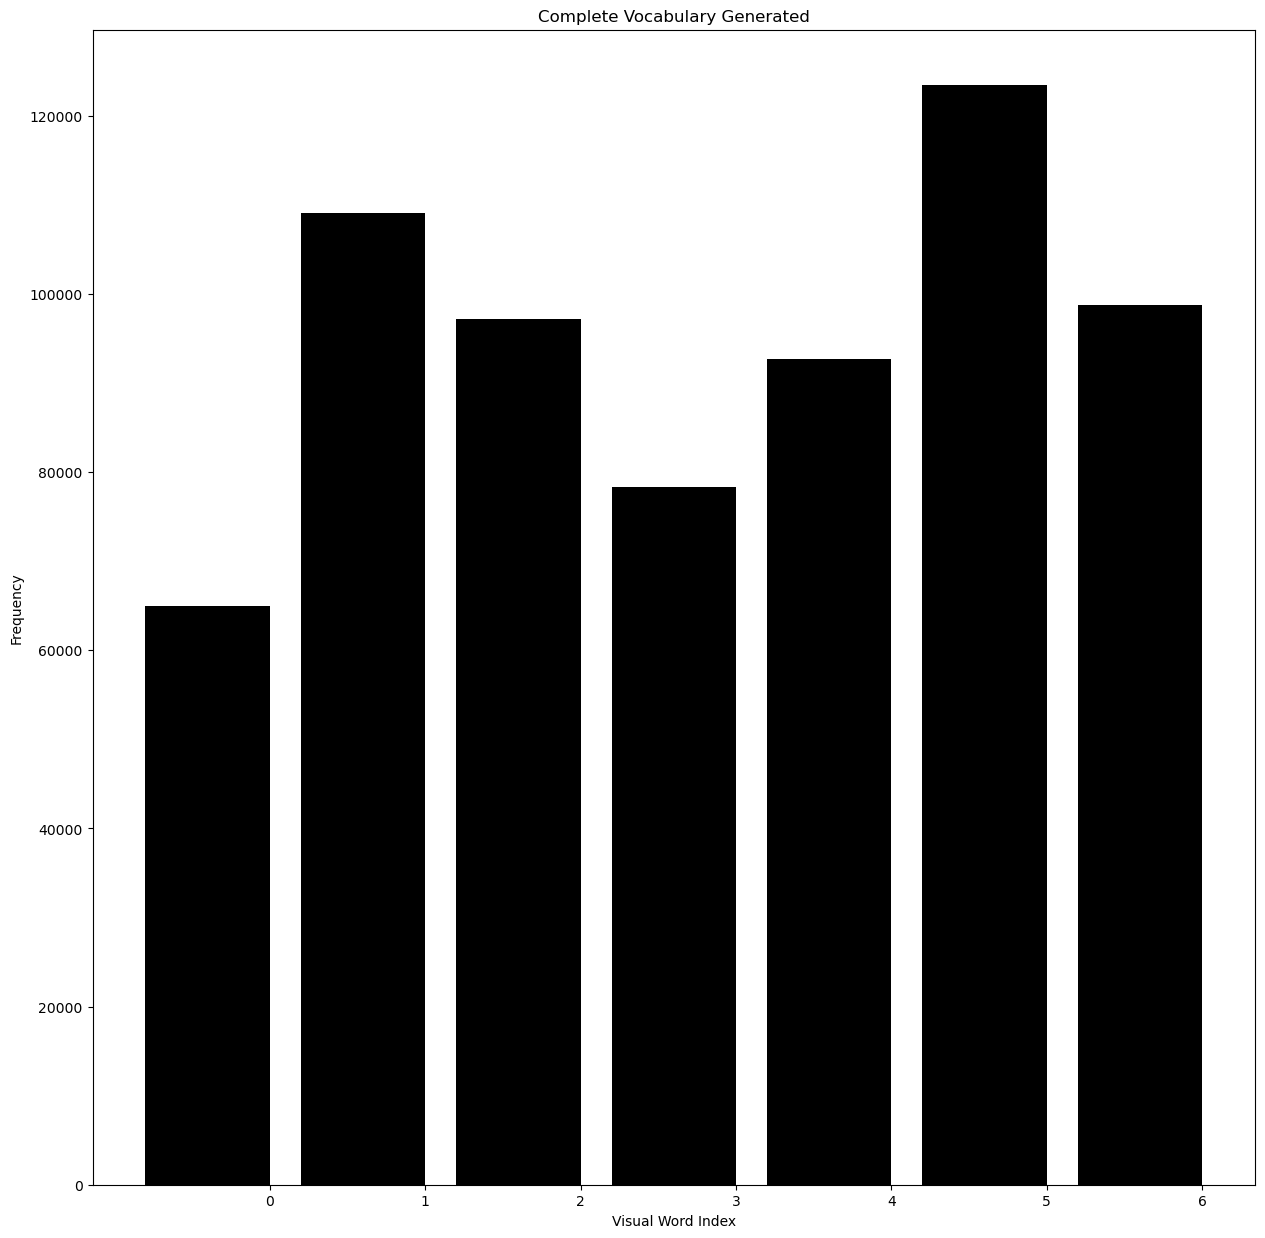

In [41]:
cv_helpers.plot_hist(bovw_hist, 7)

<center><b>Figure 18.</b> Complete Vocabulary Generated (Training Set)</center>

<p style='text-indent: 2em'>The vocabulary which show the total frequency of each "visual word" in the training set is shown above. The key features of the image have been derived and have been grouped into specific clusters or "visual words", hence making the dataset ready for machine learning.</p>

[Back to Table of Contents](#TOC)

<a id='Pipeline'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>VII. MACHINE LEARNING PIPELINE</b></h1>

<h2>Training Phase: Fitting the Models</h2>

<p style='text-indent: 2em'>Given that the functions to be used in training the model and finding the optimal parameters would incorporate scaling in their pipeline, during the training and validation phase, the derived dataset from the previous section would not be scaled beforehand. Given that the case study from which this study was inspired made use of a support vector machine model, the SVC model would be first used and trained over several C values and over different kernels.</p>

<p style='text-indent: 2em'>Moreover, the validation set would be used to find the optimal parameters whereas the training set would be used to fit the model. The reason why GridSearchCV would not be used in this pipeline is because there would be a potential data leakage, if the training set was inserted into the GridSearchCV pipeline. This is because all of the data points in the training set have been normalized together previously for the k-means clustering and have been used to create the model for the k-means clustering. Hence, by instead using the held-out validation set in the beginning, no data leakage would happen and the best, unbiased validation accuracy could be used to optimize the parameters for each model.</p>

In [42]:
# SVC model (Linear kernel) training
C_linear, SVClinear_train, SVClinear_val = cv_helpers.get_best_params_svc(
    bovw_hist, y, bovw_hist_val, y_val, 'linear')

In [43]:
# SVC model (Poly kernel) training
C_poly, SVCpoly_train, SVCpoly_val = cv_helpers.get_best_params_svc(
    bovw_hist, y, bovw_hist_val, y_val, 'poly')

In [44]:
# SVC model (rbf kernel) training
C_rbf, SVCrbf_train, SVCrbf_val = cv_helpers.get_best_params_svc(
    bovw_hist, y, bovw_hist_val, y_val, 'rbf')

In [45]:
# SVC model (Sigmoid kernel) training
C_sig, SVCsig_train, SVCsig_val = cv_helpers.get_best_params_svc(
    bovw_hist, y, bovw_hist_val, y_val, 'sigmoid')

<p style='text-indent: 2em'>Moving on, other models such as Logistic Regression, KNeighbors_Classifier, RandomForestClassifier, and GradientBoostingClassifier are also trained using the dataset.</p>

In [46]:
# Logistic Regression
C_lr, lr_train, lr_val = cv_helpers.get_best_params_lr(
    bovw_hist, y, bovw_hist_val, y_val)

In [47]:
# KNN
k, knn_train, knn_val = cv_helpers.get_best_params_knn(
    bovw_hist, y, bovw_hist_val, y_val)

In [48]:
# Random Forest Classifier
depth, rfc_train, rfc_val = cv_helpers.get_best_params_rfc(
    bovw_hist, y, bovw_hist_val, y_val)

In [49]:
# Gradient Boosting Classifier
params, gbm_train, gbm_val = cv_helpers.get_best_params_gbm(
    bovw_hist, y, bovw_hist_val, y_val)

<h2>Validation Phase: Finding the Optimal Parameters</h2>

<p style='text-indent: 2em'>After acquiring the best "validation" score, alongside the training score, of each model, the model with the best validation score would be used as the final model, regardless of the test accuracy, in the testing phase.</p>

In [50]:
df_train_val = pd.DataFrame(columns=['Name of Model',
                                     'Best Parameters',
                                     'Training Accuracy',
                                     'Validation Accuracy'])
df_train_val.loc[0] = ['SVC (Linear)', f'C = {C_linear}',
                       SVClinear_train, SVClinear_val]
df_train_val.loc[1] = ['SVC (Poly)', f'C = {C_poly}',
                       SVCpoly_train, SVCpoly_val]
df_train_val.loc[2] = ['SVC (RBF)', f'C = {C_rbf}',
                       SVCrbf_train, SVCrbf_val]
df_train_val.loc[3] = ['SVC (Sigmoid)', f'C = {C_sig}',
                       SVCsig_train, SVCsig_val]
df_train_val.loc[4] = ['Logistic Regression', f'C = {C_lr}',
                       lr_train, lr_val]
df_train_val.loc[5] = ['K-Nearest Neighbors Classifier',
                       f'n_neighbors = {k}',
                       knn_train, knn_val]
df_train_val.loc[6] = ['Random Forest Classifier',
                       f'Max Depth = {depth}',
                       rfc_train, rfc_val]
df_train_val.loc[7] = ['Gradient Boosting Classifier',
                       f'Max Depth = {params[1]}\n'
                       f'Learning Rate = {params[0]}',
                       gbm_train, gbm_val]

<p><b>Table 1.</b></p>
<p><i>List of Models, Best Parameters, Training Score, and Training Score</i></p>

In [51]:
cv_helpers.pretty_print(df_train_val)

,Name of Model,Best Parameters,Training Accuracy,Validation Accuracy
0,SVC (Linear),C = 0.001,0.816497,0.796296
1,SVC (Poly),C = 0.001,0.740037,0.748148
2,SVC (RBF),C = 1e-08,0.803058,0.777778
3,SVC (Sigmoid),C = 0.01,0.824838,0.798148
4,Logistic Regression,C = 1e-08,0.772011,0.790741
5,K-Nearest Neighbors Classifier,n_neighbors = 294,0.822521,0.777778
6,Random Forest Classifier,Max Depth = 6,0.960148,0.537037
7,Gradient Boosting Classifier,Max Depth = 13Learning Rate = 0.1,1.000000,0.774074


<p style='text-indent: 2em'>SVC (Sigmoid) was found to the best model with a validaiton accuracy of <b>0.798148</b>. This is in line with what was said in the study by Zhou, Greenspan, and Shen where non-linear kernels were found to be the best-performing models for support vector machines.<sup><a href='#Six'>6</a></sup></p>

<h2>Testing Phase: Evaluating the Test Performance of Trained Models</h2>

<p style='text-indent: 2em'>The following are the test accuracies of each model. Notwithstanding that the chosen model may have a lower test accuracy than the other models, it is still good to see how the chosen model performed as compared to other models which have not been chosen.</p>

In [52]:
bovw_hist, scaler2 = cv_helpers.standardize(bovw_hist)
bovw_hist_test = scaler2.transform(bovw_hist_test)

In [53]:
# SVC (Linear)
svc_lin = SVC(C=0.001, random_state=0, kernel='linear')
svc_lin.fit(bovw_hist, y)
svclinear_test_score = svc_lin.score(bovw_hist_test, y_test)

# SVC (Poly)
svc_poly = SVC(C=0.001, random_state=0, kernel='poly')
svc_poly.fit(bovw_hist, y)
svcpoly_test_score = svc_poly.score(bovw_hist_test, y_test)

# SVC (RBF)
svc_rbf = SVC(C=1e-08, random_state=0, kernel='rbf')
svc_rbf.fit(bovw_hist, y)
svcRbf_test_score = svc_rbf.score(bovw_hist_test, y_test)

# SVC (Sigmoid)
svc_sig = SVC(C=0.01, random_state=0, kernel='sigmoid')
svc_sig.fit(bovw_hist, y)
svcSig_test_score = svcSig_test_score = svc_sig.score(bovw_hist_test, y_test)

# Logistic Regression
lr = LogisticRegression(C=1e-08, random_state=0)
lr.fit(bovw_hist, y)
lr_test_score = lr.score(bovw_hist_test, y_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=294)
knn.fit(bovw_hist, y)
knn_test_score = knn.score(bovw_hist_test, y_test)

# Random Forest Classifier
rfc = RandomForestClassifier(max_depth=14)
rfc.fit(bovw_hist, y)
rfc_test_score = rfc.score(bovw_hist_test, y_test)

# Gradient Boosting Classifier
gbm = GradientBoostingClassifier(max_depth=12, learning_rate=0.1)
gbm.fit(bovw_hist, y)
gbm_test_score = gbm.score(bovw_hist_test, y_test)

In [54]:
df_test = pd.DataFrame(columns=['Name of Model',
                                'Best Parameters',
                                'Test Accuracy'])
df_test.loc[0] = ['SVC (Linear)', f'C = {C_linear}',
                       svclinear_test_score]
df_test.loc[1] = ['SVC (Poly)', f'C = {C_linear}',
                       svcpoly_test_score]
df_test.loc[2] = ['SVC (RBF)', f'C = {C_rbf}',
                       svcRbf_test_score]
df_test.loc[3] = ['SVC (Sigmoid)', f'C = {C_sig}',
                       svcSig_test_score]
df_test.loc[4] = ['Logistic Regression', f'C = {C_lr}',
                       lr_test_score]
df_test.loc[5] = ['K-Nearest Neighbors Classifier',
                       f'n_neighbors = {k}',
                       knn_test_score]
df_test.loc[6] = ['Random Forest Classifier',
                       f'Max Depth = {depth}',
                       rfc_test_score]
df_test.loc[7] = ['Gradient Boosting Classifier',
                       f'Max Depth = {params[1]}\n'
                       f'Learning Rate = {params[0]}',
                       gbm_test_score]

<p><b>Table 2.</b></p>
<p><i>List of Models, Best Parameters, and Test Score</i></p>

In [55]:
cv_helpers.pretty_print(df_test)

,Name of Model,Best Parameters,Test Accuracy
0,SVC (Linear),C = 0.001,0.697115
1,SVC (Poly),C = 0.001,0.700321
2,SVC (RBF),C = 1e-08,0.741987
3,SVC (Sigmoid),C = 0.01,0.689103
4,Logistic Regression,C = 1e-08,0.741987
5,K-Nearest Neighbors Classifier,n_neighbors = 294,0.661859
6,Random Forest Classifier,Max Depth = 6,0.562500
7,Gradient Boosting Classifier,Max Depth = 13Learning Rate = 0.1,0.520833


<p style='text-indent: 2em'>Given a test score or accuracy of <b>0.692308</b>, the SVC (Sigmoid) performed a bit poorly as compared to its validation score; in spite of this, its validation accuracy of <b>0.798148</b> provides a justification that it can be moderately or fairly generalized to other images, which can still be evidenced by the moderately high test accuracy.</p>

[Back to Table of Contents](#TOC)

<a id='Results'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>VIII. RESULTS AND DISCUSSION</b></h1>

<p style='text-indent: 2em'>First, in order to fairly evaluate the test accuracy of the chosen model (SVC Sigmoid), the heuristic based on the proportion chance criterion which should be exceeded would first be calculated.</p>

$$PCC * 1.25 = ((1079/2158)^{2} + (1079/2158)^{2}) * 1.25$$
$$PCC * 1.25 = 0.625$$

In [56]:
%%capture
plt.bar(height=1079, x='Normal', color='black')
plt.bar(height=1079, x='Pneumonia', color='black')
plt.title('Distribution of both Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

<center><img src='PCC.png'/></center>

<center><b>Figure 19.</b> Frequency Distribution of Both Classes</center>

<p style='text-indent: 2em'>As seen above, the classes are equally distributed, and so, given a heuristic accuracy of 0.625, the validation accuracy of the model which is <b>0.798148</b> and the test accuracy of the model which is <b>0.692308</b>, the heuristic accuracy is exceeded and so, the model performs well and does not classify randomly or by chance.</p>

In [57]:
# Predictions of the chosen model
y_pred = svc_sig.predict(bovw_hist_test)

In [58]:
%%capture
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=[0, 1], display_labels=['Normal', 'Pneumonia'],
                                       cmap='binary_r', colorbar=False)
plt.show()

<center><img src='confusion.png'/></center>

<center><b>Figure 20.</b> Confusion Matrix</center>

<p style='text-indent: 2em'>As seen above, there are more false positives as compared to false negatives. Moreover, it can be said that the model is very good at predicting positive or pneumonia cases than negative cases. This is actually a good characteristic of the model, given that in medical applications of machine learning, being able to detect most of the positive cases (wherein false positives may seep through) is better than missing the positive cases and having more false negatives seep through. This is particularly important given that surges such as the recent onbe, finding most of the positive cases is very important, as to avoid further spread of the disease by the positive cases.</p>

In [59]:
target_names = ['Normal', 'Pneumonia']

<p><b>Table 3.</b></p>
<p><i>Classification Report</i></p>

In [60]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.61      0.48      0.54       234
   Pneumonia       0.72      0.81      0.77       390

    accuracy                           0.69       624
   macro avg       0.67      0.65      0.65       624
weighted avg       0.68      0.69      0.68       624



<p style='text-indent: 2em'>Focusing more on both the precision and recall, it was found through the precision scores, that the model is indeed more capable of finding true positives over true negatives. This is further supported by the model's recall wherein the recall for pneumonia cases is 0.82, which means that the model is capable of classifying the positive cases well (given that there are few "false negatives" for pneumonia). The recall on the other hand, for normal, which is 0.48, denotes that the model often return a lot of "false false negatives" or false positives, which is not necessarily bad for screening tools used for medical purposes.</p>

<p><b>Table 4.</b></p>
<p><i>Sensitivity and Specificity</i></p>

In [61]:
df = pd.DataFrame({'Sensitivity': 319/(319+71), 'Specificity': 113/(113+121)},
                 index=[0])
df

,Sensitivity,Specificity
0,0.817949,0.482906


<p style='text-indent: 2em'>As supported by the previous result from the classification report, it can be said that the model is more capable of finding positive cases over negatives cases, given the disparity between sensitivity and specificity. This further supports the claim that the model can be used for screening cases of pneumonia, given that it is very capable of detecting several positive cases.</p>

In [62]:
dec = svc_sig.decision_function(bovw_hist_test)

In [63]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, dec)

In [64]:
%%capture
plt.plot(fpr, tpr)
x_ticks = np.arange(0, 1.1, 0.1)
y_ticks = np.arange(0, 1.1, 0.1)
plt.plot(x_ticks, y_ticks, '--r')
plt.title('Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.6, 0.8, f'AUC = {metrics.auc(fpr, tpr):.2f}')
plt.show()

<center><img src='roc_curve.png'/></center>

<center><b>Figure 21.</b> ROC Curve</center>

<p style='text-indent: 2em'>Lastly, as seen in the figure above, the ROC curve is beyond the diagonal line which means that the curve is capable of differentiating the classes very well, as compared to randomly guessing them or worse, do worse than guessing at random. Moreover, the area-under-the-curve which is 0.76 supports this statement as well.</p>

[Back to Table of Contents](#TOC)

In [70]:
def search_k_title():
    """Display the drop-down menu widget and button widget
    """
    lst_reco_state = ['normal', 'pneumonia']

    reco_k = widgets.Dropdown(
        options=lst_reco_state,
        value='normal',
        description='State',
        disabled=False,
    )

    display(reco_k)

    button = widgets.Button(description="Search", button_style='success')
    output = widgets.Output()
    display(button, output)

    def on_button_clicked(b):
        """Run an event given a click input of the button

        Parameters
        ----------
        b : Button
            Button
        """
        with output:
            clear_output(wait=True)
            lst = cv_helpers.predict(reco_k.value, svc_sig, kmeans_model, scaler, scaler2)
            print(f'The person is/have {lst[0]}')
            print('Before Processing')
            plt.imshow(lst[1])
            plt.show()
            print('After Processing')
            plt.imshow(lst[2])
            plt.show()

    button.on_click(on_button_clicked)

In [71]:
search_k_title()

Dropdown(description='State', options=('normal', 'pneumonia'), value='normal')

Button(button_style='success', description='Search', style=ButtonStyle())

Output()

<a id='Conclusion'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>IX. CONCLUSION</b></h1>

<p style='text-indent: 2em'>In conclusion, given the metrics that were found and using the dataset, the model, SVC (Sigmoid) with a C parameter of 0.01 is found to be the best, generalizable model for the given demographic of the dataset. Moreover, given its capability to detect more positive cases, it can be used as a screening tool and a secondary tool where the radiologist can run suspected positive cases through the model and confirm through the model whether the cases are indeed truly positive or not.</p>

[Back to Table of Contents](#TOC)

<a id='Recommendations'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>X. RECOMMENDATIONS</b></h1>

<p style='text-indent: 2em'>As a recommendation, given that Zhou, Greenspan, and Shen recommended the use of neural networks for image classification, an additional foray into this machine learning model may be done in order to further improve the accuracy of the model.<sup><a href='#Six'>6</a></sup> Moreover, other scalers such as RobustScaler may be used in order to check whether the accuracy improves after using the said scalers. Lastly, it would also be good to explore the same pipeline, but with different datasets, in order to see which datasets the model is good at classifiying or performing.</p>

[Back to Table of Contents](#TOC)

<a id='References'></a>
<h1 style="color:#ffffff; background-color:#000000; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;"><b>REFERENCES</b></h1>

<a id='One'></a>
<p style='margin-left: 2em'>1. Lim, S. W. (2021). Pneumonia—Overview. Encyclopedia of Respiratory Medicine, 2022 : 185–197. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7241411/</p>

<a id='Two'></a>
<p style='margin-left: 2em'>2. Faculty of Public Health (n.d.). Measures of disease burden (event-based and time-based) and population attributable risks including identification of comparison groups appropriate to Public Health. Retrieved from https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1a-epidemiology/measures-disease-burden</p>

<a id='Three'></a>
<p style='margin-left: 2em'>3. Leswing, K. After years of 5G hype and investment, Wednesday’s network launch makes it real. NBC News. https://www.nbcnews.com/health/health-news/mycoplasma-pneumonia-illness-outbreak-china-denmark-ohio-what-know-rcna127372. Published 2022; Accessed December 9, 2023.</p>

<a id='Four'></a>
<p style='margin-left: 2em'>4. Jackson, W. In Radiology, Turnaround Time is King. Diagnostic Imaging. https://www.diagnosticimaging.com/view/radiology-turnaround-time-king. Published 2015; Accessed December 9, 2023.</p>

<a id='Five'></a>
<p style='margin-left: 2em'>5. Bhargavan, Kaye, Forman, Sunshine. Workload of radiologists in United States in 2006-2007 and trends since 1991-1992. https://pubmed.ncbi.nlm.nih.gov/19508987/https://pubmed.ncbi.nlm.nih.gov/19508987/. National Library of Medicine. Published 2009; Accessed December 9, 2023.</p>

<a id='Five'></a>
<p style='margin-left: 2em'>6. Zhou, K. S., Greenspan, H., and Shen, D. (2017). Deep Learning for Medical Image Analysis. Academic Press Elsevier.</p>

<a id='Seven'></a>
<p style='margin-left: 2em'>7. RadiologyInfo.org. Pneumonia. RadiologyInfo.org. https://www.radiologyinfo.org/en/info/pneumonia#:~:text=Chest%20x%2Dray%3A%20An%20x,infiltrates)%20that%20identify%20an%20infection. Published 2023; Accessed December 9, 2023.</p>

<a id='Eight'></a>
<p style='margin-left: 2em'>8. Mooney, P. Chest X-Ray Images (Pneumonia). Kaggle. https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia; Accessed December 9, 2023.</p>

<a id='Nine'></a>
<p style='margin-left: 2em'>9. Nallamuthu, N. Handling Imbalanced Data – Machine Learning, Computer Vision and NLP. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/11/handling-imbalanced-data-machine-learning-computer-vision-and-nlp/#:~:text=The%20main%20two%20methods%20that,the%20validation%20and%20testing%20data. Published 2023; Accessed December 9, 2023.</p>

<a id='Ten'></a>
<p style='margin-left: 2em'>10. Picsellia. How to Ensure Image Dataset Quality In Image Classification. Picsellia. https://www.picsellia.com/post/image-data-quality-for-image-classification#:~:text=It%20can%20be%20complicated%20to,decent%20amount%20to%20start%20with. Published 2022; Accessed December 9, 2023</p>

<a id='Eleven'></a>
<p style='margin-left: 2em'>11. Smithuis, R. Chest X-Ray - Lung disease
Four-Pattern Approach. Radiology Assistant. https://radiologyassistant.nl/chest/chest-x-ray/lung-disease Published 2014; Accessed December 9, 2023</p>

<a id='Twelve'></a>
<p style='margin-left: 2em'>12. National Institute of Biomedical Imaging and Bioengineering. X-rays. National Institute of Biomedical Imaging and Bioengineering. https://www.nibib.nih.gov/science-education/science-topics/x-rays. Published 2022; Accessed December 9, 2023</p>

<a id='Thirteen'></a>
<p style='margin-left: 2em'>13. Rajnis. Python OpenCV | cv2.imread() method. GeeksForGeeks. https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/. Published 2023; Accessed December 9, 2023.</p>

<a id='Fourteen'></a>
<p style='margin-left: 2em'>14. LearnOpenCV. Image Resizing with OpenCV. LearnOpenCV. https://learnopencv.com/image-resizing-with-opencv/#resize-by-wdith-height; December 9, 2023</p>

<a id='Fifteen'></a>
<p style='margin-left: 2em'>15. Fisher, Perkins, Walker and Wolfart. Gaussian Smoothing. Image Processing Learning Resources. https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm. Published 2003; Accessed December 9, 2023</p>

<a id='Sixteen'></a>
<p style='margin-left: 2em'>16. Open Source Computer Vision. Color conversionsColor conversions. Open Source Computer Vision. https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html; Accessed December 9, 2023</p>

<a id='Seventeen'></a>
<p style='margin-left: 2em'>17. OpenCV. (n.d.). Histogram Equalization. Retrieved from https://docs.opencv.org/4.x/d4/d1b/tutorial_histogram_equalization.html</p>

<a id='Eighteen'></a>
<p style='margin-left: 2em'>18. Molecular Expressions. (n.d.). Contrast Manipulation in Digital Images. Retrieved from https://micro.magnet.fsu.edu/primer/java/digitalimaging/processing/contrast/index.html</p>

<a id='Nineteen'></a>
<p style='margin-left: 2em'>19. OpenCV. (n.d.). Laplace Operator. Retrieved from https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html</p>

<a id='Twenty'></a>
<p style='margin-left: 2em'>20. WisdomML. (n.d.). How to implement Laplacian Operator Edge Detection in Python. Retrieved from https://wisdomml.in/how-to-implement-laplacian-operator-edge-detection-in-python/#:~:text=The%20Laplacian%20operator%20is%20applied,edges%20in%20the%20original%20image.</p>

<a id='Twenty-one'></a>
<p style='margin-left: 2em'>21. Fisher, Perkins, Walker and Wolfart. (2003). 8-bit Color Images. Retrieved from https://homepages.inf.ed.ac.uk/rbf/HIPR2/8bitcol.htm</p>

<a id='Twenty-two'></a>
<p style='margin-left: 2em'>22. OpenCV. (n.d.). Introduction to SIFT (Scale-Invariant Feature Transform). Retrieved from https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html</p>

<a id='Twenty-three'></a>
<p style='margin-left: 2em'>23. Tyagi, D. Introduction to SIFT( Scale Invariant Feature Transform). Medium. Retrieved from https://medium.com/@deepanshut041/introduction-to-sift-scale-invariant-feature-transform-65d7f3a72d40</p>

<a id='Twenty-four'></a>
<p style='margin-left: 2em'>24. Bhavsar, M. (2020). Understanding K-Means Clustering. datamahadev. Retrieved from https://datamahadev.com/understanding-k-means-clustering/</p>

<a id='Twenty-five'></a>
<p style='margin-left: 2em'>25. Banerji, A. (2023). K-Mean: Getting the Optimal Number of Clusters. Analytics Vidhya. Retrieved from https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=The%20silhouette%20coefficient%20or%20silhouette,scikit%2Dlearn%2Fsklearn%20library.</p>

<a id='Twenty-six'></a>
<p style='margin-left: 2em'>26. GeeksforGeeks. (n.d.). ML | Mini Batch K-means clustering algorithm. Retrieved from https://www.geeksforgeeks.org/ml-mini-batch-k-means-clustering-algorithm/</p>

[Back to Table of Contents](#TOC)